# Tugas Pertemuan 2 - Pre-Processing Data Berita detik.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/tugasPPWA/Crawl-berita-pariwisata&keislaman.csv")
df.head(6)

,judul,tanggal,isi,kategori
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata
5,"Gunung Semeru Ditutup Menahun, Lalu Muncul 38....","Rabu, 25 Sep 2024 18:31 WIB",Jakarta - Gunung Semeru telah ditutup bertahun...,pariwisata


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [3]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,tanggal,isi,kategori,cleansing
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...
5,"Gunung Semeru Ditutup Menahun, Lalu Muncul 38....","Rabu, 25 Sep 2024 18:31 WIB",Jakarta - Gunung Semeru telah ditutup bertahun...,pariwisata,Jakarta Gunung Semeru telah ditutup bertahunt...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [4]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...,jakarta labuan bajo manggarai barat nusa teng...
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...,jakarta harta karun tak hanya benda saja tapi...
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...,jakarta ibu kota prancis paris menjadi perhat...
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...,jakarta kapibara kabur dari kandangnya di the...
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...,jakarta pasar loak jatinegara atau jembatan i...
5,"Gunung Semeru Ditutup Menahun, Lalu Muncul 38....","Rabu, 25 Sep 2024 18:31 WIB",Jakarta - Gunung Semeru telah ditutup bertahun...,pariwisata,Jakarta Gunung Semeru telah ditutup bertahunt...,jakarta gunung semeru telah ditutup bertahunt...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [5]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...,jakarta labuan bajo manggarai barat nusa teng...,"[jakarta, labuan, bajo, manggarai, barat, nusa..."
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...,jakarta harta karun tak hanya benda saja tapi...,"[jakarta, harta, karun, tak, hanya, benda, saj..."
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...,jakarta ibu kota prancis paris menjadi perhat...,"[jakarta, ibu, kota, prancis, paris, menjadi, ..."
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...,jakarta kapibara kabur dari kandangnya di the...,"[jakarta, kapibara, kabur, dari, kandangnya, d..."
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...,jakarta pasar loak jatinegara atau jembatan i...,"[jakarta, pasar, loak, jatinegara, atau, jemba..."
5,"Gunung Semeru Ditutup Menahun, Lalu Muncul 38....","Rabu, 25 Sep 2024 18:31 WIB",Jakarta - Gunung Semeru telah ditutup bertahun...,pariwisata,Jakarta Gunung Semeru telah ditutup bertahunt...,jakarta gunung semeru telah ditutup bertahunt...,"[jakarta, gunung, semeru, telah, ditutup, bert..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yaitu langkah untuk memilih kata-kata yang  dianggap tidak penting atau  tidak relevan, untuk mengetahui kata-kata mana yang tidak relevan berdasarkan daftar stopword removal yang digunakan.



In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [7]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata,Jakarta Labuan Bajo Manggarai Barat Nusa Teng...,jakarta labuan bajo manggarai barat nusa teng...,"[jakarta, labuan, bajo, manggarai, barat, nusa...",jakarta labuan bajo manggarai barat nusa tengg...
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata,Jakarta Harta karun tak hanya benda saja tapi...,jakarta harta karun tak hanya benda saja tapi...,"[jakarta, harta, karun, tak, hanya, benda, saj...",jakarta harta karun benda catatan arkeolog lam...
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata,Jakarta Ibu kota Prancis Paris menjadi perhat...,jakarta ibu kota prancis paris menjadi perhat...,"[jakarta, ibu, kota, prancis, paris, menjadi, ...",jakarta kota prancis paris perhatian dunia men...
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata,Jakarta Kapibara kabur dari kandangnya di The...,jakarta kapibara kabur dari kandangnya di the...,"[jakarta, kapibara, kabur, dari, kandangnya, d...",jakarta kapibara kabur kandangnya the hoo zoo ...
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata,Jakarta Pasar Loak Jatinegara atau Jembatan I...,jakarta pasar loak jatinegara atau jembatan i...,"[jakarta, pasar, loak, jatinegara, atau, jemba...",jakarta pasar loak jatinegara jembatan item pi...
5,"Gunung Semeru Ditutup Menahun, Lalu Muncul 38....","Rabu, 25 Sep 2024 18:31 WIB",Jakarta - Gunung Semeru telah ditutup bertahun...,pariwisata,Jakarta Gunung Semeru telah ditutup bertahunt...,jakarta gunung semeru telah ditutup bertahunt...,"[jakarta, gunung, semeru, telah, ditutup, bert...",jakarta gunung semeru ditutup bertahuntahun pa...


In [8]:
df.to_csv("/content/drive/My Drive/tugasPPWA/hasil_preprocesing.csv",encoding='utf8', index=False)

# Provide a link for manual download
df.to_csv("hasil_preprocesing.csv")

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** Ubah dokumen teks apa pun menjadi vektor yang berisi  frekuensi  setiap kata dalam dokumen. Pembobotan TF-IDF menghitung nilai bobot untuk setiap kata di setiap dokumen. Ini dibagi menjadi dua proses

yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung  kemunculan setiap kata dalam dokumen,  dan jika sebuah kata memiliki kemunculan  terbanyak,  kata tersebut memiliki nilai tertinggi.

**IDF (Inverse Document Frequency)** Hitung jumlah dokumen untuk setiap kata dengan nilai tertinggi yang  jarang muncul dalam dokumen.
 Jika kata  sering muncul di dokumen, hasilnya akan bernilai kecil.

In [9]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/tugasPPWA/hasil_preprocesing.csv", sep=",")

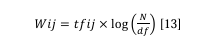

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [11]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aadimmirrusulih,aailan,aainkalkauar,aajilan,aajilin,aakaami,aalam,aan,aawaa,abad,...,ziljalali,zina,zinah,zogba,zona,zone,zoo,zubaidi,zuleima,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.050982,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
